In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
def shapeNposition_w(mod, see=True):
  weights=mod.get_weights()
  print('Number of layers: ', np.shape(weights))
  cont=1
  shp_0=(0,0,0,0)
  positions=[]

  for n,i in enumerate(weights):
    if  len(np.shape(i))==4:
      shp_1=np.shape(i)
      if see:    
        if shp_1[2]!=shp_0[3]:
          print('Position:', n, '\tlayer No.:', cont, '\t', np.shape(i), '*')
        else:
          print('Position:', n, '\tlayer No.:', cont, '\t', np.shape(i))
      positions=np.append(positions,n)
      shp_0=shp_1
      cont=cont+1
  positions=positions.astype('int')
  return positions

In [ ]:
def positionNnameLayers(mod, see=True, layer='conv'):
  layer_f={'conv':'.convolutional.Conv2D', 'block': '.merge.Add'}
  position=[]
  names=[]
  cont=0
  for n, i in enumerate(mod.layers):
    if str(i).find(layer_f[layer])!=-1:
      cont=cont+1
      name_conv=i.name
      names=np.append(names,name_conv)
      if see:
        print(n, cont, name_conv)
      position=np.append(position,n)
  return names

In [ ]:
modelx = keras.applications.ResNet50V2(weights="imagenet", include_top=False, input_shape=(256,256,3))

94674944/94668760 [==============================] - 2s 0us/step


In [ ]:
_=shapeNposition_w(modelx)

Number of layers:  (270,)
Position: 0 	layer No.: 1 	 (7, 7, 3, 64) *
Position: 6 	layer No.: 2 	 (1, 1, 64, 64)
Position: 11 	layer No.: 3 	 (3, 3, 64, 64)
Position: 16 	layer No.: 4 	 (1, 1, 64, 256)
Position: 18 	layer No.: 5 	 (1, 1, 64, 256) *
Position: 24 	layer No.: 6 	 (1, 1, 256, 64)
Position: 29 	layer No.: 7 	 (3, 3, 64, 64)
Position: 34 	layer No.: 8 	 (1, 1, 64, 256)
Position: 40 	layer No.: 9 	 (1, 1, 256, 64)
Position: 45 	layer No.: 10 	 (3, 3, 64, 64)
Position: 50 	layer No.: 11 	 (1, 1, 64, 256)
Position: 56 	layer No.: 12 	 (1, 1, 256, 128)
Position: 61 	layer No.: 13 	 (3, 3, 128, 128)
Position: 66 	layer No.: 14 	 (1, 1, 256, 512) *
Position: 68 	layer No.: 15 	 (1, 1, 128, 512) *
Position: 74 	layer No.: 16 	 (1, 1, 512, 128)
Position: 79 	layer No.: 17 	 (3, 3, 128, 128)
Position: 84 	layer No.: 18 	 (1, 1, 128, 512)
Position: 90 	layer No.: 19 	 (1, 1, 512, 128)
Position: 95 	layer No.: 20 	 (3, 3, 128, 128)
Position: 100 	layer No.: 21 	 (1, 1, 128, 512)
Positi

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
layer_names=positionNnameLayers(modelx)

2 1 conv1_conv
7 2 conv2_block1_1_conv
11 3 conv2_block1_2_conv
14 4 conv2_block1_0_conv
15 5 conv2_block1_3_conv
19 6 conv2_block2_1_conv
23 7 conv2_block2_2_conv
26 8 conv2_block2_3_conv
30 9 conv2_block3_1_conv
34 10 conv2_block3_2_conv
38 11 conv2_block3_3_conv
42 12 conv3_block1_1_conv
46 13 conv3_block1_2_conv
49 14 conv3_block1_0_conv
50 15 conv3_block1_3_conv
54 16 conv3_block2_1_conv
58 17 conv3_block2_2_conv
61 18 conv3_block2_3_conv
65 19 conv3_block3_1_conv
69 20 conv3_block3_2_conv
72 21 conv3_block3_3_conv
76 22 conv3_block4_1_conv
80 23 conv3_block4_2_conv
84 24 conv3_block4_3_conv
88 25 conv4_block1_1_conv
92 26 conv4_block1_2_conv
95 27 conv4_block1_0_conv
96 28 conv4_block1_3_conv
100 29 conv4_block2_1_conv
104 30 conv4_block2_2_conv
107 31 conv4_block2_3_conv
111 32 conv4_block3_1_conv
115 33 conv4_block3_2_conv
118 34 conv4_block3_3_conv
122 35 conv4_block4_1_conv
126 36 conv4_block4_2_conv
129 37 conv4_block4_3_conv
133 38 conv4_block5_1_conv
137 39 conv4_block5_2_

### Visualización de las mapas

In [ ]:
def deprocess_image(img):
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.15

    #img = img[25:-25, 25:-25, :]

    img += 0.5
    img = np.clip(img, 0, 1)

    img *= 255
    img = np.clip(img, 0, 255).astype("uint8")
    return img

In [ ]:
def compute_loss(imagi, filter_index, feature, n_k=0, kernel=True):  
    if kernel:
      fm=tf.nn.conv2d(imagi,  feature[conv.astype('int')[n_k]][:,:,:,filter_index:filter_index+1], strides=1, padding='SAME')
      return tf.reduce_mean(fm)
    else:
      activation = feature(imagi)
      filter_activation = activation[:, 2:-2, 2:-2, filter_index]
      return tf.reduce_mean(filter_activation)

In [ ]:
@tf.function
def gradient_ascent_step(img, filter_index, learning_rate, feact, kernel=True):       
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img, filter_index, feact, kernel=kernel)
    
    grads = tape.gradient(loss, img)
    grads = tf.math.l2_normalize(grads)
    img += learning_rate * grads
    return loss, img

In [ ]:
def initialize_image():
    img = tf.random.uniform((1, 256, 256, 3))
    return (img - 0.5) * 0.25

In [ ]:
def visualize_filter(filter_index, fea, kernel=True):
    iterations = 30
    learning_ratex = 10.0
    img = initialize_image() 
    for iteration in range(iterations):
        loss, img = gradient_ascent_step(img, filter_index, learning_ratex, fea, kernel)

    img = deprocess_image(img[0].numpy())
    return loss, img

In [ ]:
layer = modelx.get_layer(name=layer_names[34])# se obtiene hasta la capa indicada
feature_x=keras.Model(inputs=modelx.inputs, outputs=layer.output)

In [ ]:
nu_k=64#np.shape(feature_extractor.output)[-1]
col=16
row=(nu_k//col)+int((nu_k%col)!=0)

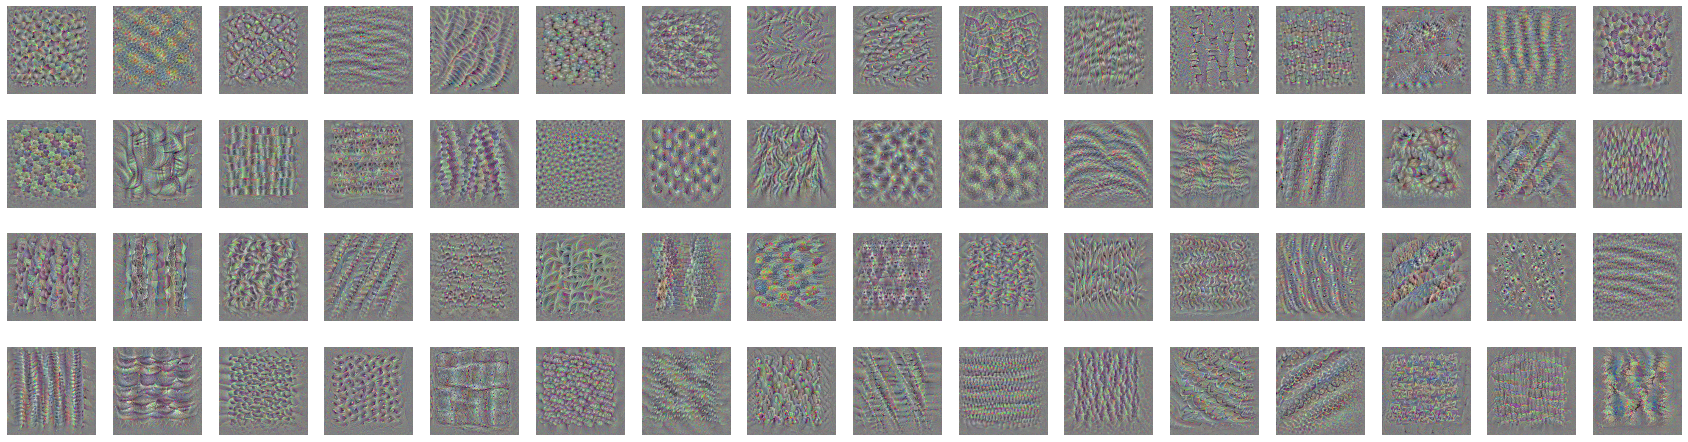

In [ ]:
plt.figure(figsize=(30,8))
for i in range(nu_k):
  plt.subplot(row,col,i+1)
  loss, fm = visualize_filter(i, feature_x, kernel=False)
  plt.imshow(fm)
  plt.axis('off')